In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Leer datos separados por comas

d0 = pd.read_csv('vid18_180219.dat', delimiter = ',')

#Asignar los datos a un DataFrame

df1 = pd.DataFrame(d0)

#Crear una nueva columna con los datos del tiempo en formato datetime

df1["Date"] = pd.to_datetime(df1.TIMESTAMP)

#Quedarse solo con las columnas de timpo "Date" y la de las temperaturas "AirTC_Avg"

df1 = df1.filter(["Date", "AirTC_Avg"], axis=1)

#Imprime las primeras 10 filas

df1.head(10)

Date  AirTC_Avg
0 2018-05-11 20:10:00      23.50
1 2018-05-11 20:20:00      22.96
2 2018-05-11 20:30:00      22.73
3 2018-05-11 20:40:00      22.40
4 2018-05-11 20:50:00      22.46
5 2018-05-11 21:00:00      23.07
6 2018-05-11 21:10:00      22.56
7 2018-05-11 21:20:00      22.49
8 2018-05-11 21:30:00      21.82
9 2018-05-11 21:40:00      21.04

In [3]:
#Crea una nueva columna con el año

df1["Year"]  = df1["Date"].dt.year

#Crea una nueva columna con el mes
    
df1["Month"] = df1["Date"].dt.month

#Crea una nueva columna con el día

df1["Day"]   = df1["Date"].dt.day

#Crea una nueva columna con la hora

df1["Hour"]  = df1["Date"].dt.hour

#Imprime algunos datos del principio y del final

df1.head(), df1.tail()

(                 Date  AirTC_Avg  Year  Month  Day  Hour
 0 2018-05-11 20:10:00      23.50  2018      5   11    20
 1 2018-05-11 20:20:00      22.96  2018      5   11    20
 2 2018-05-11 20:30:00      22.73  2018      5   11    20
 3 2018-05-11 20:40:00      22.40  2018      5   11    20
 4 2018-05-11 20:50:00      22.46  2018      5   11    20,
                      Date  AirTC_Avg  Year  Month  Day  Hour
 40655 2019-02-18 06:50:00      3.699  2019      2   18     6
 40656 2019-02-18 07:00:00      3.492  2019      2   18     7
 40657 2019-02-18 07:10:00      3.387  2019      2   18     7
 40658 2019-02-18 07:20:00      3.243  2019      2   18     7
 40659 2019-02-18 07:30:00      3.552  2019      2   18     7)

In [4]:
#Crea un nuevo DataFrame con datos cuya fecha "Date" sea mayor o
#igual a "2018-11-1"
#formato "YYY-MM-DD"

df2 = pd.DataFrame(df1[df1["Date"] >= "2018-11-1"])

#Como se queda con el índice del DataFrame anterior, se reinicia 
#y se elimina el índice anterior 

df2 = df2.reset_index(drop=True)
df2.head(), df2.tail()

(                 Date  AirTC_Avg  Year  Month  Day  Hour
 0 2018-11-01 00:00:00       9.13  2018     11    1     0
 1 2018-11-01 00:10:00       8.89  2018     11    1     0
 2 2018-11-01 00:20:00       8.66  2018     11    1     0
 3 2018-11-01 00:30:00       8.52  2018     11    1     0
 4 2018-11-01 00:40:00       8.47  2018     11    1     0,
                      Date  AirTC_Avg  Year  Month  Day  Hour
 15720 2019-02-18 06:50:00      3.699  2019      2   18     6
 15721 2019-02-18 07:00:00      3.492  2019      2   18     7
 15722 2019-02-18 07:10:00      3.387  2019      2   18     7
 15723 2019-02-18 07:20:00      3.243  2019      2   18     7
 15724 2019-02-18 07:30:00      3.552  2019      2   18     7)

In [5]:
#Se agrupan los datos por hora y se hace el promedio

df2["TMean"] = round(df2.groupby(["Year", "Month", "Day", "Hour"]).transform(np.mean),1)

#Se agrupan los datos por día y se obtiene la temperatura máxima de "AirTC_Avg"

df2["Tmax"]  = round(df2.groupby(["Year","Month","Day"])["AirTC_Avg"].transform(np.max), 1)

#Se agrupan los datos por día y se obtiene la temperatura mínima de "AirTC_Avg"

df2["Tmin"]  = round(df2.groupby(["Year","Month","Day"])["AirTC_Avg"].transform(np.min), 1)
df2.head(10)

Date  AirTC_Avg  Year  Month  Day  Hour  TMean  Tmax  Tmin
0 2018-11-01 00:00:00       9.13  2018     11    1     0    8.7  29.6   6.1
1 2018-11-01 00:10:00       8.89  2018     11    1     0    8.7  29.6   6.1
2 2018-11-01 00:20:00       8.66  2018     11    1     0    8.7  29.6   6.1
3 2018-11-01 00:30:00       8.52  2018     11    1     0    8.7  29.6   6.1
4 2018-11-01 00:40:00       8.47  2018     11    1     0    8.7  29.6   6.1
5 2018-11-01 00:50:00       8.58  2018     11    1     0    8.7  29.6   6.1
6 2018-11-01 01:00:00       8.56  2018     11    1     1    8.5  29.6   6.1
7 2018-11-01 01:10:00       8.32  2018     11    1     1    8.5  29.6   6.1
8 2018-11-01 01:20:00       8.15  2018     11    1     1    8.5  29.6   6.1
9 2018-11-01 01:30:00       8.25  2018     11    1     1    8.5  29.6   6.1

In [6]:
#Para eliminar los duplicados para que quede por hora en vez de día

df2 = df2.drop_duplicates(subset=["Hour", "Day", "Month", "Year"])
df2 = df2.reset_index(drop=True)
df2.head(10)

Date  AirTC_Avg  Year  Month  Day  Hour  TMean  Tmax  Tmin
0 2018-11-01 00:00:00      9.130  2018     11    1     0    8.7  29.6   6.1
1 2018-11-01 01:00:00      8.560  2018     11    1     1    8.5  29.6   6.1
2 2018-11-01 02:00:00      8.830  2018     11    1     2    8.7  29.6   6.1
3 2018-11-01 03:00:00      9.130  2018     11    1     3    8.8  29.6   6.1
4 2018-11-01 04:00:00      7.924  2018     11    1     4    7.4  29.6   6.1
5 2018-11-01 05:00:00      7.261  2018     11    1     5    7.3  29.6   6.1
6 2018-11-01 06:00:00      7.723  2018     11    1     6    6.8  29.6   6.1
7 2018-11-01 07:00:00      6.125  2018     11    1     7    8.1  29.6   6.1
8 2018-11-01 08:00:00     12.430  2018     11    1     8   15.0  29.6   6.1
9 2018-11-01 09:00:00     18.080  2018     11    1     9   19.7  29.6   6.1

In [7]:
#Elimina la columna "Date" y "AirTC_Avg"

df2 = df2.drop(["Date"],1)
df2 = df2.drop(["AirTC_Avg"],1)
df2.head(10)

Year  Month  Day  Hour  TMean  Tmax  Tmin
0  2018     11    1     0    8.7  29.6   6.1
1  2018     11    1     1    8.5  29.6   6.1
2  2018     11    1     2    8.7  29.6   6.1
3  2018     11    1     3    8.8  29.6   6.1
4  2018     11    1     4    7.4  29.6   6.1
5  2018     11    1     5    7.3  29.6   6.1
6  2018     11    1     6    6.8  29.6   6.1
7  2018     11    1     7    8.1  29.6   6.1
8  2018     11    1     8   15.0  29.6   6.1
9  2018     11    1     9   19.7  29.6   6.1

In [8]:
#Arreglo con las Unidades de Frío
UF = []
for m in range(0, len(df2)):
    if(df2["TMean"][m] <= 1.4):
        UF.append(0)
    elif(1.5 <= df2["TMean"][m] <= 2.4):
        UF.append(0.5)
    elif(2.5 <= df2["TMean"][m] <= 9.1):
        UF.append(1)
    elif(9.2 <= df2["TMean"][m] <= 12.4):
        UF.append(0.5)
    elif(12.5 <= df2["TMean"][m] <= 15.9):
        UF.append(0)
    elif(16 <= df2["TMean"][m] <= 18):
        UF.append(-0.5)
    elif(18 < df2["TMean"][m]):
        UF.append(-1)
df2["UF"] = UF
df2.tail(10)

Year  Month  Day  Hour  TMean  Tmax  Tmin   UF
2613  2019      2   17    22    8.5  21.0   3.3  1.0
2614  2019      2   17    23    7.4  21.0   3.3  1.0
2615  2019      2   18     0    6.8   7.0   3.2  1.0
2616  2019      2   18     1    6.0   7.0   3.2  1.0
2617  2019      2   18     2    5.6   7.0   3.2  1.0
2618  2019      2   18     3    5.4   7.0   3.2  1.0
2619  2019      2   18     4    4.7   7.0   3.2  1.0
2620  2019      2   18     5    4.2   7.0   3.2  1.0
2621  2019      2   18     6    3.7   7.0   3.2  1.0
2622  2019      2   18     7    3.4   7.0   3.2  1.0

In [9]:
#Calcula las unidades de frío acumuladas

df2["UF24"] = df2.groupby(["Year","Month","Day"])["UF"].transform("sum")

#Nuevo data frame con los datos diarios

df24 = pd.DataFrame(df2.drop_duplicates(["Year","Month","Day"]))
df24 = df24.reset_index(drop=True)
df24.head(10)

Year  Month  Day  Hour  TMean  Tmax  Tmin   UF  UF24
0  2018     11    1     0    8.7  29.6   6.1  1.0  -0.5
1  2018     11    2     0   10.6  31.4  10.0  0.5  -9.0
2  2018     11    3     0   12.5  30.5  10.2  0.0  -9.5
3  2018     11    4     0   12.7  31.4  11.2  0.0 -11.5
4  2018     11    5     0   13.9  31.2  11.1  0.0  -8.0
5  2018     11    6     0   12.8  32.7  11.6  0.0 -11.5
6  2018     11    7     0   14.0  32.5  10.5  0.0  -8.5
7  2018     11    8     0   12.0  31.4  10.1  0.5  -9.5
8  2018     11    9     0   12.3  29.9  11.0  0.5  -8.5
9  2018     11   10     0   12.1  29.1   8.8  0.5  -5.0

In [10]:
#Unidades UF24 acumuladas diarias

df24["UF24tot"] = np.cumsum(df24["UF24"])
df24.head(10)

Year  Month  Day  Hour  TMean  Tmax  Tmin   UF  UF24  UF24tot
0  2018     11    1     0    8.7  29.6   6.1  1.0  -0.5     -0.5
1  2018     11    2     0   10.6  31.4  10.0  0.5  -9.0     -9.5
2  2018     11    3     0   12.5  30.5  10.2  0.0  -9.5    -19.0
3  2018     11    4     0   12.7  31.4  11.2  0.0 -11.5    -30.5
4  2018     11    5     0   13.9  31.2  11.1  0.0  -8.0    -38.5
5  2018     11    6     0   12.8  32.7  11.6  0.0 -11.5    -50.0
6  2018     11    7     0   14.0  32.5  10.5  0.0  -8.5    -58.5
7  2018     11    8     0   12.0  31.4  10.1  0.5  -9.5    -68.0
8  2018     11    9     0   12.3  29.9  11.0  0.5  -8.5    -76.5
9  2018     11   10     0   12.1  29.1   8.8  0.5  -5.0    -81.5

In [11]:
#Datos para graficar
Days    = []
Tmax    = []
Tmin    = []
UF24tot = []
count   = 0
for m in range(0, len(df24)):
    Tmax.append(df24["Tmax"][m])
    Tmin.append(df24["Tmin"][m])
    UF24tot.append(df24["UF24tot"][m])
    count = count + 1
    Days.append(count)
    

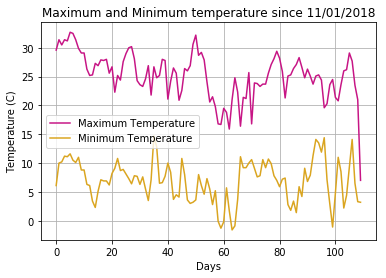

In [12]:
#Graficando
plt.plot(Tmax, label="Maximum Temperature", color = "mediumvioletred")
plt.xlabel("Days")
plt.ylabel("Temperature (C)")
plt.grid()

plt.plot(Tmin, label = "Minimum Temperature", color = "goldenrod")
plt.legend()
plt.title("Maximum and Minimum temperature since 11/01/2018")
plt.savefig("grafica_1",plt=2000)
plt.figure(figsize=(100,100))
plt.show()

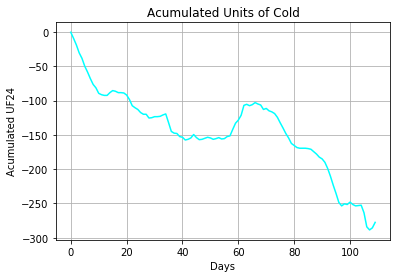

In [13]:
plt.plot(UF24tot, label="Acumulated units of cold", color = "aqua")
plt.xlabel("Days")
plt.ylabel("Acumulated UF24")
plt.grid()

plt.title("Acumulated Units of Cold")
plt.savefig("Frio_Acumulado",plt=2000)
plt.show()

In [14]:
df2.head(10)

Year  Month  Day  Hour  TMean  Tmax  Tmin   UF  UF24
0     2018     11    1     0    8.7  29.6   6.1  1.0  -0.5
1     2018     11    1     1    8.5  29.6   6.1  1.0  -0.5
2     2018     11    1     2    8.7  29.6   6.1  1.0  -0.5
3     2018     11    1     3    8.8  29.6   6.1  1.0  -0.5
4     2018     11    1     4    7.4  29.6   6.1  1.0  -0.5
5     2018     11    1     5    7.3  29.6   6.1  1.0  -0.5
6     2018     11    1     6    6.8  29.6   6.1  1.0  -0.5
7     2018     11    1     7    8.1  29.6   6.1  1.0  -0.5
8     2018     11    1     8   15.0  29.6   6.1  0.0  -0.5
9     2018     11    1     9   19.7  29.6   6.1 -1.0  -0.5
10    2018     11    1    10   22.4  29.6   6.1 -1.0  -0.5
11    2018     11    1    11   23.9  29.6   6.1 -1.0  -0.5
12    2018     11    1    12   25.1  29.6   6.1 -1.0  -0.5
13    2018     11    1    13   26.5  29.6   6.1 -1.0  -0.5
14    2018     11    1    14   27.4  29.6   6.1 -1.0  -0.5
15    2018     11    1    15   28.2  29.6   6.1 -1.0  -0.5
16    2018     11    1    16   28.6  29.6   6.1 -1.0  -0.5
17    2018     11    1    17   27.4  29.6   6.1 -1.0  -0.5
18    2018     11    1    18   16.9  29.6   6.1 -0.5  -0.5
19    2018     11    1    19   14.7  29.6   6.1  0.0  -0.5
20    2018     11    1    20   14.1  29.6   6.1  0.0  -0.5
21    2018     11    1    21   13.0  29.6   6.1  0.0  -0.5
22    2018     11    1    22   12.3  29.6   6.1  0.5  -0.5
23    2018     11    1    23   11.0  29.6   6.1  0.5  -0.5
24    2018     11    2     0   10.6  31.4  10.0  0.5  -9.0
25    2018     11    2     1   10.2  31.4  10.0  0.5  -9.0
26    2018     11    2     2   10.5  31.4  10.0  0.5  -9.0
27    2018     11    2     3   11.7  31.4  10.0  0.5  -9.0
28    2018     11    2     4   12.1  31.4  10.0  0.5  -9.0
29    2018     11    2     5   12.1  31.4  10.0  0.5  -9.0
...    ...    ...  ...   ...    ...   ...   ...  ...   ...
2593  2019      2   17     2    6.7  21.0   3.3  1.0   3.0
2594  2019      2   17     3    5.1  21.0   3.3  1.0   3.0
2595  2019      2   17     4    4.5  21.0   3.3  1.0   3.0
2596  2019      2   17     5    4.6  21.0   3.3  1.0   3.0
2597  2019      2   17     6    4.1  21.0   3.3  1.0   3.0
2598  2019      2   17     7    3.8  21.0   3.3  1.0   3.0
2599  2019      2   17     8    9.5  21.0   3.3  0.5   3.0
2600  2019      2   17     9   14.0  21.0   3.3  0.0   3.0
2601  2019      2   17    10   17.1  21.0   3.3 -0.5   3.0
2602  2019      2   17    11   18.6  21.0   3.3 -1.0   3.0
2603  2019      2   17    12   19.2  21.0   3.3 -1.0   3.0
2604  2019      2   17    13   19.4  21.0   3.3 -1.0   3.0
2605  2019      2   17    14   20.4  21.0   3.3 -1.0   3.0
2606  2019      2   17    15   20.8  21.0   3.3 -1.0   3.0
2607  2019      2   17    16   20.5  21.0   3.3 -1.0   3.0
2608  2019      2   17    17   20.1  21.0   3.3 -1.0   3.0
2609  2019      2   17    18   18.0  21.0   3.3 -0.5   3.0
2610  2019      2   17    19   15.3  21.0   3.3  0.0   3.0
2611  2019      2   17    20   12.1  21.0   3.3  0.5   3.0
2612  2019      2   17    21   10.5  21.0   3.3  0.5   3.0
2613  2019      2   17    22    8.5  21.0   3.3  1.0   3.0
2614  2019      2   17    23    7.4  21.0   3.3  1.0   3.0
2615  2019      2   18     0    6.8   7.0   3.2  1.0   8.0
2616  2019      2   18     1    6.0   7.0   3.2  1.0   8.0
2617  2019      2   18     2    5.6   7.0   3.2  1.0   8.0
2618  2019      2   18     3    5.4   7.0   3.2  1.0   8.0
2619  2019      2   18     4    4.7   7.0   3.2  1.0   8.0
2620  2019      2   18     5    4.2   7.0   3.2  1.0   8.0
2621  2019      2   18     6    3.7   7.0   3.2  1.0   8.0
2622  2019      2   18     7    3.4   7.0   3.2  1.0   8.0

[2623 rows x 9 columns]

In [15]:
#Arreglo con las HF según el modelo Grageda
HF = []
HC = []
bulean = False
for m in range(0, len(df2)):
    if(df2["Tmin"][m]<10):
        
        for i in range(m,len(df2)):
            if(0<df2["TMean"][i]<=10):
                HF.append(1)
                HC.append(0)
            elif(df2["TMean"][i]>=25):
                HF.append(0)
                HC.append(1)
            else:
                HF.append(0)
                HC.append(0)
        bulean = True
    if(bulean == True):
        break
    continue


In [18]:
df2["HF"] = HF
df2["HC"] = HC
df2.head(10)

Year  Month  Day  Hour  TMean  Tmax  Tmin   UF  UF24  HF  HC
0  2018     11    1     0    8.7  29.6   6.1  1.0  -0.5   1   0
1  2018     11    1     1    8.5  29.6   6.1  1.0  -0.5   1   0
2  2018     11    1     2    8.7  29.6   6.1  1.0  -0.5   1   0
3  2018     11    1     3    8.8  29.6   6.1  1.0  -0.5   1   0
4  2018     11    1     4    7.4  29.6   6.1  1.0  -0.5   1   0
5  2018     11    1     5    7.3  29.6   6.1  1.0  -0.5   1   0
6  2018     11    1     6    6.8  29.6   6.1  1.0  -0.5   1   0
7  2018     11    1     7    8.1  29.6   6.1  1.0  -0.5   1   0
8  2018     11    1     8   15.0  29.6   6.1  0.0  -0.5   0   0
9  2018     11    1     9   19.7  29.6   6.1 -1.0  -0.5   0   0

In [21]:
#Se consiguen las horas frío y "horas calientes" acumuladas por día
df2["HF24"] = df2.groupby(["Year","Month","Day"])["HF"].transform("sum")
df2["HC24"] = df2.groupby(["Year","Month","Day"])["HC"].transform("sum")

#Para quitar los duplicados se crea un nuevo DataFrame

dfG24 = pd.DataFrame(df2.drop_duplicates(["Year","Month","Day"]))
dfG24 = dfG24.reset_index(drop=True)
dfG24.head(10)


Year  Month  Day  Hour  TMean  Tmax  Tmin   UF  UF24  HF  HC  HF24  HC24
0  2018     11    1     0    8.7  29.6   6.1  1.0  -0.5   1   0     8     6
1  2018     11    2     0   10.6  31.4  10.0  0.5  -9.0   0   0     0     8
2  2018     11    3     0   12.5  30.5  10.2  0.0  -9.5   0   0     0     8
3  2018     11    4     0   12.7  31.4  11.2  0.0 -11.5   0   0     0     8
4  2018     11    5     0   13.9  31.2  11.1  0.0  -8.0   0   0     0     8
5  2018     11    6     0   12.8  32.7  11.6  0.0 -11.5   0   0     0     8
6  2018     11    7     0   14.0  32.5  10.5  0.0  -8.5   0   0     0     8
7  2018     11    8     0   12.0  31.4  10.1  0.5  -9.5   0   0     0     8
8  2018     11    9     0   12.3  29.9  11.0  0.5  -8.5   0   0     0     8
9  2018     11   10     0   12.1  29.1   8.8  0.5  -5.0   0   0     3     6

In [27]:
#Se crea la columna (de momento vacío) para las horas frío efectivas
dfG24["HFE"] = 0
dfG24

Year  Month  Day  Hour  TMean  Tmax  Tmin   UF  UF24  HF  HC  HF24  HC24  \
0    2018     11    1     0    8.7  29.6   6.1  1.0  -0.5   1   0     8     6   
1    2018     11    2     0   10.6  31.4  10.0  0.5  -9.0   0   0     0     8   
2    2018     11    3     0   12.5  30.5  10.2  0.0  -9.5   0   0     0     8   
3    2018     11    4     0   12.7  31.4  11.2  0.0 -11.5   0   0     0     8   
4    2018     11    5     0   13.9  31.2  11.1  0.0  -8.0   0   0     0     8   
5    2018     11    6     0   12.8  32.7  11.6  0.0 -11.5   0   0     0     8   
6    2018     11    7     0   14.0  32.5  10.5  0.0  -8.5   0   0     0     8   
7    2018     11    8     0   12.0  31.4  10.1  0.5  -9.5   0   0     0     8   
8    2018     11    9     0   12.3  29.9  11.0  0.5  -8.5   0   0     0     8   
9    2018     11   10     0   12.1  29.1   8.8  0.5  -5.0   0   0     3     6   
10   2018     11   11     0   11.1  29.1   8.8  0.5  -8.0   0   0     4     6   
11   2018     11   12     0   10.0  26.3   6.3  0.5  -2.0   1   0     8     4   
12   2018     11   13     0   11.1  25.2   6.1  0.5  -1.0   0   0     5     1   
13   2018     11   14     0   12.4  25.3   3.4  0.5   0.0   0   0     9     0   
14   2018     11   15     0    6.4  27.3   2.3  1.0   4.0   1   0    11     4   
15   2018     11   16     0    5.9  26.9   5.1  1.0   3.0   1   0    12     4   
16   2018     11   17     0    9.0  27.9   7.1  1.0  -1.0   1   0     8     5   
17   2018     11   18     0   10.7  27.8   6.9  0.5  -2.0   0   0     8     6   
18   2018     11   19     0    8.6  28.0   6.9  1.0   0.0   1   0     8     6   
19   2018     11   20     0   10.6  25.6   6.2  0.5  -0.5   0   0     7     3   
20   2018     11   21     0   10.5  26.7   8.2  0.5  -3.0   0   0     7     5   
21   2018     11   22     0   12.5  22.3   9.1  0.0  -6.5   0   0     2     0   
22   2018     11   23     0   13.6  25.2  10.8  0.0  -9.0   0   0     0     0   
23   2018     11   24     0   11.2  24.4   8.7  0.5  -3.0   0   0     2     0   
24   2018     11   25     0   12.2  27.6   8.9  0.5  -2.5   0   0     2     4   
25   2018     11   26     0    9.3  29.0   8.1  0.5  -4.5   1   0     6     5   
26   2018     11   27     0   10.3  30.0   7.3  0.5  -2.5   0   0     8     7   
27   2018     11   28     0    8.7  30.2   6.4  1.0   0.0   1   0     9     6   
28   2018     11   29     0    9.4  28.1   7.8  0.5  -5.5   1   0     6     6   
29   2018     11   30     0   12.2  24.3   7.7  0.5   0.5   0   0     9     0   
..    ...    ...  ...   ...    ...   ...   ...  ...   ...  ..  ..   ...   ...   
80   2019      1   20     0   11.3  28.2   5.9  0.5  -3.0   0   0     6     6   
81   2019      1   21     0   10.9  25.9   7.2  0.5  -3.0   0   0     7     3   
82   2019      1   22     0   12.7  21.3   7.4  0.0  -1.0   0   0     4     0   
83   2019      1   23     0    9.2  25.1   2.8  0.5   0.0   1   0     9     0   
84   2019      1   24     0    8.2  25.3   1.8  1.0   0.0   1   0     9     1   
85   2019      1   25     0    9.6  26.4   3.4  0.5  -0.5   1   0     9     3   
86   2019      1   26     0    7.8  27.1   1.4  1.0  -1.0   1   0     9     4   
87   2019      1   27     0    8.4  28.3   5.9  1.0  -3.5   1   0     8     6   
88   2019      1   28     0    9.2  26.6   4.2  0.5  -3.5   1   0     8     3   
89   2019      1   29     0   12.5  24.8   9.1  0.0  -4.5   0   0     4     0   
90   2019      1   30     0   10.2  26.3   6.8  0.5  -2.5   0   0     7     4   
91   2019      1   31     0    9.6  25.1   7.9  0.5  -5.0   1   0     5     0   
92   2019      2    1     0   11.9  23.7  11.3  0.5  -9.0   0   0     0     0   
93   2019      2    2     0   14.3  25.1  14.1  0.0 -11.5   0   0     0     0   
94   2019      2    3     0   15.4  25.3  13.5  0.0 -13.0   0   0     0     0   
95   2019      2    4     0   14.8  24.4  11.9  0.0 -12.0   0   0     0     0   
96   2019      2    5     0   16.8  19.6  14.4 -0.5 -13.0   0   0     0     0   
97   2019      2    6     0   13.9  

In [29]:
#Se crea la columna con el número de horas frío efectivas díarias
#(HFE)
al = 0
HFE = []
for m in range(0, len(dfG24)):
    al = dfG24["HF24"][m]-dfG24["HC24"][m]
    if(al >= 0):
        HFE.append(al)
    else:
        HFE.append(None)
dfG24["HFE"] = HFE
dfG24

Year  Month  Day  Hour  TMean  Tmax  Tmin   UF  UF24  HF  HC  HF24  HC24  \
0    2018     11    1     0    8.7  29.6   6.1  1.0  -0.5   1   0     8     6   
1    2018     11    2     0   10.6  31.4  10.0  0.5  -9.0   0   0     0     8   
2    2018     11    3     0   12.5  30.5  10.2  0.0  -9.5   0   0     0     8   
3    2018     11    4     0   12.7  31.4  11.2  0.0 -11.5   0   0     0     8   
4    2018     11    5     0   13.9  31.2  11.1  0.0  -8.0   0   0     0     8   
5    2018     11    6     0   12.8  32.7  11.6  0.0 -11.5   0   0     0     8   
6    2018     11    7     0   14.0  32.5  10.5  0.0  -8.5   0   0     0     8   
7    2018     11    8     0   12.0  31.4  10.1  0.5  -9.5   0   0     0     8   
8    2018     11    9     0   12.3  29.9  11.0  0.5  -8.5   0   0     0     8   
9    2018     11   10     0   12.1  29.1   8.8  0.5  -5.0   0   0     3     6   
10   2018     11   11     0   11.1  29.1   8.8  0.5  -8.0   0   0     4     6   
11   2018     11   12     0   10.0  26.3   6.3  0.5  -2.0   1   0     8     4   
12   2018     11   13     0   11.1  25.2   6.1  0.5  -1.0   0   0     5     1   
13   2018     11   14     0   12.4  25.3   3.4  0.5   0.0   0   0     9     0   
14   2018     11   15     0    6.4  27.3   2.3  1.0   4.0   1   0    11     4   
15   2018     11   16     0    5.9  26.9   5.1  1.0   3.0   1   0    12     4   
16   2018     11   17     0    9.0  27.9   7.1  1.0  -1.0   1   0     8     5   
17   2018     11   18     0   10.7  27.8   6.9  0.5  -2.0   0   0     8     6   
18   2018     11   19     0    8.6  28.0   6.9  1.0   0.0   1   0     8     6   
19   2018     11   20     0   10.6  25.6   6.2  0.5  -0.5   0   0     7     3   
20   2018     11   21     0   10.5  26.7   8.2  0.5  -3.0   0   0     7     5   
21   2018     11   22     0   12.5  22.3   9.1  0.0  -6.5   0   0     2     0   
22   2018     11   23     0   13.6  25.2  10.8  0.0  -9.0   0   0     0     0   
23   2018     11   24     0   11.2  24.4   8.7  0.5  -3.0   0   0     2     0   
24   2018     11   25     0   12.2  27.6   8.9  0.5  -2.5   0   0     2     4   
25   2018     11   26     0    9.3  29.0   8.1  0.5  -4.5   1   0     6     5   
26   2018     11   27     0   10.3  30.0   7.3  0.5  -2.5   0   0     8     7   
27   2018     11   28     0    8.7  30.2   6.4  1.0   0.0   1   0     9     6   
28   2018     11   29     0    9.4  28.1   7.8  0.5  -5.5   1   0     6     6   
29   2018     11   30     0   12.2  24.3   7.7  0.5   0.5   0   0     9     0   
..    ...    ...  ...   ...    ...   ...   ...  ...   ...  ..  ..   ...   ...   
80   2019      1   20     0   11.3  28.2   5.9  0.5  -3.0   0   0     6     6   
81   2019      1   21     0   10.9  25.9   7.2  0.5  -3.0   0   0     7     3   
82   2019      1   22     0   12.7  21.3   7.4  0.0  -1.0   0   0     4     0   
83   2019      1   23     0    9.2  25.1   2.8  0.5   0.0   1   0     9     0   
84   2019      1   24     0    8.2  25.3   1.8  1.0   0.0   1   0     9     1   
85   2019      1   25     0    9.6  26.4   3.4  0.5  -0.5   1   0     9     3   
86   2019      1   26     0    7.8  27.1   1.4  1.0  -1.0   1   0     9     4   
87   2019      1   27     0    8.4  28.3   5.9  1.0  -3.5   1   0     8     6   
88   2019      1   28     0    9.2  26.6   4.2  0.5  -3.5   1   0     8     3   
89   2019      1   29     0   12.5  24.8   9.1  0.0  -4.5   0   0     4     0   
90   2019      1   30     0   10.2  26.3   6.8  0.5  -2.5   0   0     7     4   
91   2019      1   31     0    9.6  25.1   7.9  0.5  -5.0   1   0     5     0   
92   2019      2    1     0   11.9  23.7  11.3  0.5  -9.0   0   0     0     0   
93   2019      2    2     0   14.3  25.1  14.1  0.0 -11.5   0   0     0     0   
94   2019      2    3     0   15.4  25.3  13.5  0.0 -13.0   0   0     0     0   
95   2019      2    4     0   14.8  24.4  11.9  0.0 -12.0   0   0     0     0   
96   2019      2    5     0   16.8  19.6  14.4 -0.5 -13.0   0   0     0     0   
97   2019      2    6     0   13.9  

In [17]:
Hora = 0
HF = 0
HFE = 0
count = 0
for i in range(0, len(df2)):
    if(df2["Tmin"][i] < 10):
    for k in range(0, len(df)):
        if(0 < df2["TMean"][k] <= 10):
        HF = HF + 1
        count = count + 1
        elif(count > 23):
        

IndentationError: expected an indented block (<ipython-input-17-40ae9e786aef>, line 7)